# Pandas y Sklearn

--------------------------------------------------------------------------
## Contenido
0. <a href="#import"> Instalaciones e importaciones necesarias  </a> <br>

1. <a href="#pandas"> Lectura y representación de datasets con Pandas  </a> <br>

    1.1. <a href="#datasets_pandas"> Dataframes de Pandas  </a> <br>
    1.2. <a href="#lectura_pandas"> Lectura de datasets  </a> <br>
    1.3. <a href="#transform"> Transformaciones  </a> <br>
    1.4. <a href="#codificacion"> Codificación de atributos discretos  </a> <br>
    1.5. <a href="#nans"> Tratamiento de valores ausentes  </a> <br>    

2. <a href="#training">Entrenamiento de modelos </a> <br>
    2.1. <a href="#regression">Entrenamiento regresion  </a> <br>
    2.2. <a href="#classification">Entrenamiento clasificacion </a> <br>

    
-------------------------------------------------

## 0. Instalaciones e importaciones necesarias <a name="import"> </a>

In [ ]:
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## 1. Lectura y representación de datasets con Pandas <a name="pandas"> </a>

### 1.1. Dataframes de Pandas <a name="datasets_pandas"> </a>

Pandas es una herramienta que nos facilita la lectura de archivos del tipo excel o csv. Para los que no los conozcan los archivos csv (Comma Separate Value) como su nombre indica son archivo en los que los valores están separados por coma (habitualmente). Estos pueden ser representados en forma de tablas, como generalmente vemos en excel. Podéis echarle un ojo a los archivos titanic.csv y concrete.csv para familiarizaros con el formato.

En primer lugar, veamos como trabajar con este tipo de datos en Python. Para trabajar con este tipo de archivos Pandas hace uso de una estructura de datos llamada DataFrame. Si tenemos una única columna también podemos usar el tipo Series, aunque para esta sesión no nos hará falta.

In [2]:
# Creamos un dataframe con 3 columnas C1, C2 y C3 y 10 filas. Sus valores seran números aleatorios entre 0 y 1

data = np.random.rand(10,3)

df = pd.DataFrame(data)

df_col = pd.DataFrame(data,columns=['C1', 'C2', 'C3'])
df_col

,C1,C2,C3
0,0.628123,0.791986,0.929898
1,0.676571,0.063212,0.970475
2,0.021492,0.358547,0.145182
3,0.423203,0.636996,0.356055
4,0.401841,0.477883,0.026279
5,0.813431,0.152006,0.585508
6,0.693308,0.006660,0.227614
7,0.751329,0.651104,0.155214
8,0.686396,0.352772,0.173912
9,0.365198,0.727752,0.302020


In [3]:
# Podemos acceder a una fila o columna concreta del dataframe

# Acceder a la fila 2 del dataframe
print(df_col.iloc[1])

# Acceder a la columna 2 del dataframe
print(df_col.iloc[:,1])
print(df_col["C2"])

C1    0.676571
C2    0.063212
C3    0.970475
Name: 1, dtype: float64
0    0.791986
1    0.063212
2    0.358547
3    0.636996
4    0.477883
5    0.152006
6    0.006660
7    0.651104
8    0.352772
9    0.727752
Name: C2, dtype: float64
0    0.791986
1    0.063212
2    0.358547
3    0.636996
4    0.477883
5    0.152006
6    0.006660
7    0.651104
8    0.352772
9    0.727752
Name: C2, dtype: float64


In [4]:
# Podemos añadir también nuevas columnas al dataframe

df_col["C4"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df_col

,C1,C2,C3,C4
0,0.628123,0.791986,0.929898,1
1,0.676571,0.063212,0.970475,2
2,0.021492,0.358547,0.145182,3
3,0.423203,0.636996,0.356055,4
4,0.401841,0.477883,0.026279,5
5,0.813431,0.152006,0.585508,6
6,0.693308,0.006660,0.227614,7
7,0.751329,0.651104,0.155214,8
8,0.686396,0.352772,0.173912,9
9,0.365198,0.727752,0.302020,10


In [5]:
# Podemos realizar consultas más complejas que seleccionar simplemente una fila o columna

# Nos quedamos con las filas cuyo valor en C1 sea mayor que 0.7
print(df_col[df_col["C1"] > 0.7])

# Podemos hacer lo mismo pero quedándonos solo con la columna C1
print(df_col[df_col["C1"] > 0.7]["C1"])

# Podemos incluir una expresión booleana que afecte a más de una columna.
# Por ejemplo las filas cuyo valor en C1 sea mayor que 0.7 y en C2 menor que 0.7
print((df_col[(df_col["C1"] > 0.7) & (df_col["C2"] < 0.7)]))

         C1        C2        C3  C4
5  0.813431  0.152006  0.585508   6
7  0.751329  0.651104  0.155214   8
5    0.813431
7    0.751329
Name: C1, dtype: float64
         C1        C2        C3  C4
5  0.813431  0.152006  0.585508   6
7  0.751329  0.651104  0.155214   8


¿Se te ocurre alguna otra consulta interesante que podamos hacer? ¡Es el momento de preguntar!

### 1.2. Lectura de dataframes <a name="lectura_pandas"> </a>

Una vez visto las funciones básicas pasemos a trabajar con algunos csv más grandes. 

In [6]:
# Para leer un dataframe basta usar la funcion read_csv

titanic = pd.read_csv("titanic.csv")
titanic

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [7]:
# Podemos usar las siguientes funciones para ver información sobre el dataframe

print(titanic.columns)
print(titanic.info())
print(titanic.describe())
print(titanic.dtypes)
print(titanic.values)

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'survived'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
None
            pclass          age        sibsp        parch         fare  \
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000   
mean      2.294882    29.881135

## 1.3. Transformaciones <a name="transform"> </a>

Pongamos en práctica lo visto en la sección anterior y hagamos alguna transformaciones sobre nuestro DataFrame. Para cualquier duda no dudes en preguntar.

In [ ]:
# Una vez visto lo básico vamos a realizar algunos ejercicios
# EJERCICIO
# - Añadir al dataset una nueva columna llamada ticket-fare que sea la diferencia entre las columnas ticket y fare
# - Crear una nueva columna que sea fare-norm resultado de normalizar la columna fare entre 0 y 1. 
#   La normalización podemos llevarla a cabo de 3 formas
#        1. Dividir cada valor entre el maximo de la columna
#        2. Restar cada valor con el minimo y dividir entre la diferencia entre el maximo y minimo
#        3. Restar cada valor con la media de la columna y dividir por la desviacion estandar (no escala entre 0 y 1)

**Pulsa dos veces para ver la solución**

<!--

titanic["ticket-fare"] = titanic["ticket"].astype(str) + titanic["fare"].astype(str)

titanic["fare_norm1"] = titanic["fare"] / titanic["fare"].max()

titanic["fare_norm2"] = (titanic["fare"] - titanic["fare"].min()) / (titanic["fare"].max() - titanic["fare"].min())

titanic["fare_norm3"] = (titanic["fare"] - titanic["fare"].mean()) / titanic["fare"].std()


print(titanic["fare_norm1"].min(), titanic["fare_norm1"].max())
print(titanic["fare_norm2"].min(), titanic["fare_norm2"].max())
print(titanic["fare_norm3"].mean(), titanic["fare_norm3"].std())

>


Para algunas transformaciones más complicadas tendremos que usar funciones adicionales como map y apply.

In [52]:
# EJERCICIO
# Podemos crearnos funciones personalizadas para aplicar sobre el dataset haciendo uso de las funciones de apply y map.
# Define una funcion que reciba una edad y devuelva Niño si la edad es menor que 10, Adulto si es mayor que 18 y Joven caso contrario
# Luego mediante la funcion apply crea una nueva columna que sea age_str haciendo uso de esta funcion

**Pulsa dos veces para ver la solución**

<!--

def calcula_edad(e):
    if e < 10:
        return "Niño"
    elif e > 18:
        return "Adulto"
    return "Joven"

age_str = titanic["age"].apply(calcula_edad)
titanic["age_str"] = age_str
age_str

>

In [15]:
# Sin embargo, por comodidad puede ser que prefiramos tener valores númericos a cadena de caracteres. Haciendo uso ahora de la funcion map
# podemos conseguir esto

age_str = titanic["age_str"].map({"Niño":1,"Joven":2,"Adulto":3})
titanic["age_str"] = age_str
age_str

0       3
1       1
2       1
3       3
4       3
       ..
1304    2
1305    2
1306    3
1307    3
1308    3
Name: age_str, Length: 1309, dtype: int64

## 1.4. Codificación de atributos discretos <a name="codificacion"> </a>

Muchos algoritmos de aprendizaje solo soportan valores númericos, por lo que es necesario transformar los atributos discretos en numéricos para ello.
Podemos distinguir 3 categorías dentro de atributos discretos
  - *Binarios*: Toman dos posibles valores opuestos, por ejemplo sex en nuestro dataframe
  - *Categóricos*: Similar al anterior pero tomando más de dos valores, por ejemplo embarked, el puerto de embarque
  - *Ordinales*: Es como un categórico pero con una relación de orden, por ejemplo pclass, que indica la clase del billete

Para el primero, basta con asociar a cada sexo un número (0 y 1) para su codificación

Para el tercero, se haría de forma similar, asociando un número de forma que corresponda al orden de las clases, por ejemplo 1 para los billetes 
más caros, 2 para los intermedios y 3 para los más baratos. En nuestro caso esta codificación no es necesaria porque ya viene hecha, pero si los billetes
tomaran los valores "Primera clase", "Segunda clase" y "Tercera clase" por ejemplo, si sería necesario.

Para el segundo, no podemos usar esta técnica, ya que implicaría que tenemos un orden entre los valores que realmente no existe. Por tanto, lo que
haremos será crear tantas columnas como posibles valores tome la variable y cada fila tendrá un 1 en la columna correspondiente al valor que tomaba
y 0 en todas las demás


In [53]:
# EJERCICIO
# Codifica las variables de sexo y embarked anteriores con los métodos adecuados. Para las variables ordinales usa la función de pandas get_dummies()
# Para saber los posibles valores que toma una columna te puede servir la funcion value_counts

**Pulsa dos veces para ver la solución**

<!--

print(titanic["sex"].value_counts())
titanic["sex_level"] = titanic["sex"].map({"male": 0, "female": 1})


titanic1 = pd.get_dummies(titanic['embarked'])

>

## 1.5. Tratamiento de valores ausentes <a name="nans"> </a>

Si os habéis fijado en el dataframe anterior, el DataFrame presenta valores del tipo NaN o NA. Esto se da generalmente cuando esa celda del dataframe
se encuentra vacía, es decir, que no tiene ningun valor asociado. Los modelos de machine learning no pueden ser entrenados con esta clase de 
valores, ya que no sabrían que hacer con ellos. La opción más sencilla sería descartar cualquier fila que presentara estos valores, pero
con algunas técnicas simples podemos evitar esto

In [2]:
# Cargamos de nuevo los datos
titanic = pd.read_csv("titanic.csv")

In [3]:
# Comprobamos para que columnas hay valores nulos
titanic.isnull().any()

pclass      False
name        False
sex         False
age          True
sibsp       False
parch       False
ticket      False
fare         True
cabin        True
embarked     True
survived    False
dtype: bool

In [4]:
# Otra forma mas sencilla de verlo
titanic.columns[titanic.isnull().any()]

Index(['age', 'fare', 'cabin', 'embarked'], dtype='object')

Como decíamos se podrían eliminar filas con estos valores. Esto no es muy recomedable, sobre todo si nuestro dataframe es pequeño ya que 
perderíamos mucha información, pero como ejercico práctico es útil ver como se hace.

In [54]:
# EJERCICIO
# Crea otro dataframe basado en titanic eliminando las filas con valores nulos. Usa las funciones isnull() y dropna()

**Pulsa dos veces para ver la solución**

<!--

titanic2 = titanic.dropna()
titanic2.columns[titanic2.isnull().any()]

>

Para evitar eliminar filas de nuestro dataset podemos intentar rellenar estos valores que faltan con la información que nos aportan el resto de valores de la columna correspondiente. La idea más simple es, para los valores numéricos, rellenar estos huecos con la media de la columna y para los categóricos, usar la moda.

In [ ]:
# EJERCICIO
# Crea 4 columnas nuevas que se basen en las 4 columnas con valores NaN rellenando estos valores o bien con la media o bien con la moda. 
# Para ello usa la funcion fillna()
# Deberas de usar la funcion mode del modulo statistics para calcular la moda, ya que la funcion que proporciona pandas te devolvera NaN
# en caso de encontrarse alguno

**Pulsa dos veces para ver la solución**

<!--

from statistics import mode
titanic["age_fill"] = titanic["age"].fillna(titanic["age"].mean())
titanic["fare_fill"] = titanic["fare"].fillna(titanic["fare"].mean())

cabin_fill = mode(titanic["cabin"])
titanic["cabin_fill"] = titanic["cabin"].fillna(cabin_fill)
embarked_fill = mode(titanic["embarked"])
titanic["embarked_fill"] = titanic["embarked"].fillna(embarked_fill)

>

Ahora podríamos borrar las 4 columnas originales y usar las que ya están rellenas

In [8]:
remove = (titanic.columns[titanic.isnull().any()])
titanic3 = titanic.drop(columns=(remove))
titanic3

,pclass,name,sex,sibsp,parch,ticket,survived,age_fill,fare_fill,embarked_fill
0,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160,1,29.000000,211.3375,S
1,1,"Allison, Master. Hudson Trevor",male,1,2,113781,1,0.916700,151.5500,S
2,1,"Allison, Miss. Helen Loraine",female,1,2,113781,0,2.000000,151.5500,S
3,1,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781,0,30.000000,151.5500,S
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781,0,25.000000,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,1,0,2665,0,14.500000,14.4542,C
1305,3,"Zabour, Miss. Thamine",female,1,0,2665,0,29.881135,14.4542,C
1306,3,"Zakarian, Mr. Mapriededer",male,0,0,2656,0,26.500000,7.2250,C
1307,3,"Zakarian, Mr. Ortin",male,0,0,2670,0,27.000000,7.2250,C


## 2. Entrenamiento de modelos <a name="training"> </a>

Hasta ahora hemos visto una forma simple de limpiar nuestro dataframe y codificar las columnas necesarias. Existen técnicas más avanzadas para tratar nuestro dataframe, como generar nuevas variables con PCA o técnicas similares, codificación de fechas, eliminación de outliers, etc. Pero con las técnicas que hemos visto es más que suficiente para poder entrenar algunos modelos de machine learning y entender su funcionamiento.

En el mundo del aprendizaje automático existen 3 tipos de aprendizajes: supervisado, no supervisado y por refuerzo. Para este taller nos centraremos en el primer tipo de entrenamiento. Este tipo de entrenamiento parte de un conjunto de datos (generalmente estructurado en forma de DataFrame) y trata de predecir un valor. Podemos resolver dos tipos de problemas con estos modelos: regresión, donde tratamos de predecir un número y clasificación, en el que tratamos de predecir un valor discreto, es decir, una clase. Por ejemplo el primer tipo de problema sería predecir el peso de una persona en función de su altura y la segunda predecir si un pasajero del titanic sobrevive o no en función de varias características.

Antes que nada, para la reproducibilidad de los experimentos, establecemos una semilla aleatoria.

In [39]:
import numpy as np
import random

np.random.seed(123)
random.seed(123)

### 2.1. Entrenamiento regresion <a name="regression"> </a>

Comencemos con un problema de regresión. Para ello hemos elegido un dataset de datos sobre el cemento y trataremos de predecir la fuerza de compresión de distintos tipos de cementos en función de varias de sus características

In [56]:
# Leemos el fichero concrete.csv y tomamos como valor a predecir la columna "Concrete compressive strength"
X = pd.read_csv("concrete.csv")

y = X.pop("Concrete compressive strength")

print(X)
print(y)

      Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      Coarse Aggregate  Fine Aggregate  Age  
0               1040.0           676.0   28  
1               1055.0           676.0   28  
2                932.

Existen infinidad de modelos para resolver problemas de regresión, pero vamos centrarnos en el más sencillo: la regresión lineal. Pasemos a la pizarra para ver como funciona este modelo.

La teoría puede parecer muy complicada, pero para programarlo gracias a la librería de sklearn en pocas lineas podemos entrenar un modelo y realizar predicciones.

In [60]:
estimador = LinearRegression()

estimador.fit(X,y)

estimador.score(X,y)

0.6155198704142721

El número que obtenemos con la función score es la métrica conocida con $R^2$ Esta nos da un valor entre 0 y 1 dependiendo de lo que se acerquen nuestras predicciones al valor real, siendo 0 el peor modelo posible (similar a predecir simplemente la media de los valores a predecir) y 1 el mejor modelo. En nuestro caso 0.6 indica que nuestro modelo no es particularmente bueno.

Podemos guardar nuestro modelo ya entrenado y leerlo en cualquier momento

In [42]:
with open('regression_model.pkl', 'wb') as file:
    pickle.dump(estimador, file)

In [57]:
with open('regression_model.pkl', 'rb') as file:
    estimador = pickle.load(file)

Por otro lado, alguien puede pensar que estamos haciendo trampa. El modelo ha entrenado con unos datos que ha aprendido y luego estamos pididendole que haga predicciones sobre estos datos, cuando en la vida real nos interesará entrenarlo con unos datos pero luego predecirlo con otros nuevos. En este caso, por ejemplo, dadas unas condiciones de fabricación del cemento determinar si tendrá una fuerza de compresión mayor o menor. 

Para evitar estas trampas tenemos dos opciones: holdout (o división en entrenamiento y test) o validación cruzada. Para entenderlos mejor de nuevo pasaemos a explicar a la pizarra.

In [58]:
# Dividimos nuestros datos en 4 conjuntos, dos para entrenar y dos para realizar predicciones
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [59]:
# Entrenamos nuestro conjunto y sacamos las métricas de evaluación
estimador = LinearRegression()
estimador.fit(X_train, y_train)
estimador.score(X_test,y_test)

0.6119143172468748

In [62]:
# Otra opción es entrenar mediante validación cruzada, especialmente útil para cuando tenemos pocos datos y no podemos
# dividir entre train y test
estimador = LinearRegression()
y_pred = cross_val_predict(estimador,X,y,cv=5)
scores = cross_val_score(estimador, X, y, cv=5, scoring='r2')
print(scores)

[0.33015205 0.41207076 0.45175533 0.60725028 0.50374183]


### 2.2. Entrenamiento clasificacion <a name="classification"> </a>

De igual forma, para clasificación tenemos una gran variedad de modelos disponibles pero optaremos de nuevo por el más simple: el regresor logístico. Para ello veamos la explicación en la pizarra.

Hagamos las transformaciones necesarias sobre nuestro dataset del titanic que vimos en aparatados anteriores

In [65]:
X = titanic3.copy()

X["sex_level"] = X["sex"].map({"male": 0, "female": 1})

X = pd.get_dummies(X, columns=['embarked_fill'], prefix='embarked', drop_first=True)

y = X.pop("survived")
X = X.drop(["name", "ticket", "sex"], axis=1)

In [66]:
X

,pclass,sibsp,parch,age_fill,fare_fill,sex_level,embarked_Q,embarked_S
0,1,0,0,29.000000,211.3375,1,False,True
1,1,1,2,0.916700,151.5500,0,False,True
2,1,1,2,2.000000,151.5500,1,False,True
3,1,1,2,30.000000,151.5500,0,False,True
4,1,1,2,25.000000,151.5500,1,False,True
...,...,...,...,...,...,...,...,...
1304,3,1,0,14.500000,14.4542,1,False,False
1305,3,1,0,29.881135,14.4542,1,False,False
1306,3,0,0,26.500000,7.2250,0,False,False
1307,3,0,0,27.000000,7.2250,0,False,False


Para que el clasificador pueda entrenar bien deberíamos de tener un balanceo entre las clases. En nuestro caso, que hubiera un número parecido de personas que sobrevivieron y que no. Como este es un ejemplo de prueba no nos importa realmente, pero si fuera nuestro trabajo deberíamos de intentar balancear el dataset. Para ello hay dos técnicas principales:
- Oversampling: Generar nuevos datos de forma artificial para la clase minoritaria. Estos se hace generando valores parecidos a los de la clase que queremos compensar.
- Undersampling: Eliminar datos de la clase mayoritaria hasta que ambas clases tengan una cantidad similar de entradas

survived
0    809
1    500
Name: count, dtype: int64


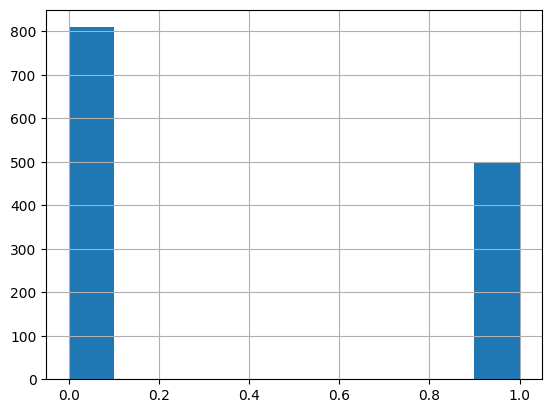

In [67]:
y.hist()
print(y.value_counts())

El entrenamiento de un regresor logístico es prácticametne igual que el de un regresor lineal (en cuanto a codigo se refiere).

In [ ]:
# EJERCICIO
# De forma similar al apartado anterior, divide el conjunto de entrenamiento en 4 subconjuntos, entrena un clasificador del tipo LogisticRegression(),
# saca las predicciones y obtén el valor de accuracy (porcentaje de acierto)

0.7938931297709924


**Pulsa dos veces para ver la solución**

<!--

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

clasificador = LogisticRegression(max_iter=5000)
clasificador.fit(X_train,y_train)

y_pred = clasificador.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred))

>

Representando nuestras predicciones frente a los valores reales podemos ver en que casos se equivoca más nuestro modelo. A esta representación se le conoce como matriz de confusión.

<Axes: >

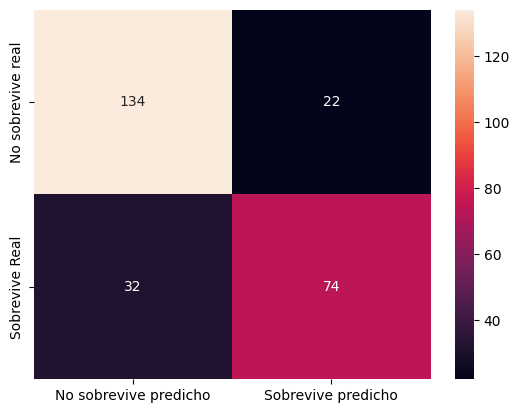

In [69]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), columns=["No sobrevive predicho","Sobrevive predicho"],index=["No sobrevive real","Sobrevive Real"])
sns.heatmap(df, annot=True, fmt="d")

Por último, podemos ver los valores que toman los coeficientes del modelo, es decir, a que variable les da más importancia neustro modelo.

In [51]:
features = np.asarray(X_train.columns)

coefficients = clasificador.coef_

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients[0]})

# Ordenar por la magnitud de los coeficientes
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Mostrar los coeficientes de manera legible
print(coef_df[['Feature', 'Coefficient']])

      Feature  Coefficient
5   sex_level     2.521601
0      pclass    -1.077874
7  embarked_S    -0.548131
6  embarked_Q    -0.378967
1       sibsp    -0.274860
3    age_fill    -0.039389
2       parch     0.011448
4   fare_fill     0.000609
